# In Class Lab 13 Template
# Cosmological Tools

In this lab we will build on the Class called `CosmologicalTools` that we developed as part of Lab 12. 

For Lab 13, we will create functions that compute: Look Back Time, Comoving Distance, Luminosity Distance and Angular Diameter Distance. 


In [1]:
# import modules
import numpy as np
import astropy.units as u

# For Lab 12: Import the constant for the speed of light
from astropy.constants import c

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


# Lab 12 : added
# integrating tools from SciPy  
from scipy.integrate import simps


In [2]:
# Define the benchmark cosmology at z =0
# Planck 2016 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc
        

In [3]:
# Define the Einstein-DeSitter cosmology (Matter Dominated)
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same = h_planck




# Part 1 :  Look Back Time

A) 

Complete the function ``LookBackTime`` that takes as inputs the desired redshift and returns the corresponding time (Gyr ago). To do this, we need to Numerically integrate :


$ t_L = \int_0^z \frac{dz'}{(1+z') H(z')}$


The scipy function ``simps`` is really useful for numerical integration. At the start of the program I have 
imported this module:  ``from scipy.integrate import simps`` 


To use it, I have already defined an array with redshifts, spaced in intervals of 0.001
    
``zrange = np.arange(zo, ze, 1e-3)``

Where zo is the redshift of the observer (it's us, so zo= 0).  And ze is the redshift of the emitter. 

Next define the integrand and utilize simps to integrate:

``simps(y(x), x)``


B) 

- How many Gyr ago was z = 1 in the benchmark cosmology? 
- What is the age of the universe in the benchmark cosmology?  Use a large z value to estimate this. 
- What is the age in the Einstein De Sitter cosmology (where $\Omega_m=1$ and all other density parameters are 0) ? 
- Which cosmology results in the youngest age for the universe? 


C) 

Complete the plot template for Look Back Time as a function of 1+ z for both the benchmark and Einstein De Sitter cosmologies. You will need loop over the ``LookBackTime`` function  from z = (0, 50) using a list comprehension. Follow the instructions in the template. 

List Comprehension Syntax: ``[ expression for item in list if conditional ]``
This is equivalent to:

``for item in list:``

``     if conditional:``
    
``        expression``


# Part 2:  Comoving and Proper Distance


A)

Complete the function  ``ComovingDistance`` that takes as input: the redshift when the photon was observed and the redshift when the photon was emitted.  The function returns the Comoving Radial Distance from an observer at z=z_o, $D_C(z)$, by numerically integrating the following: 

$D_C(z) = c \int_{z_0}^{z_e} \frac{dz'}{H(z)}$

Where $c$ is the speed of light.  If $z_0$=0, $D_C(0)$ is equivalent to the proper distance to that object today (line of sight distance).
 
B)
- What is the size of the observable universe in the Benchmark cosmology today?  (use a large redshift) 
- What is the size in the Einstein De Sitter cosmology?  Which is smaller? 


C)

What is the current radial distance between two galaxies that are closely located on the sky, where one is at z=0.01 and the second galaxy is at z =0.05 ?


D) 

Complete the function ``ProperDistance`` that takes as input the the redshift when the photon was observed and emitted and returns the Proper Distance at that observed redshift.  I.e. it computes:

$\frac{D_C(z)}{(1+z_0)}$  

If $z_0$=0 this function returns the same value as the `ComovingDistance` function.


E) 

What is the size of the observable universe at z=2 ? 

F) 

Plot the Horizon Distance as a Function of Redshift out to z=10 for the BenchMark and Einstein DeSitter Cosmology




# Part 3:  Luminosity Distance

Determining distances to standard candles


A)

Complete the function ``LuminosityDistanc`` that takes as input the emitted redshift and returns

$D_L = D_C(1+z)$

B)

Consider a Type 1A  Supernova (absolute magnitude M = -19.3 $\pm$ 0.3) that goes off at an unknown redshift.  We measure an apparent magnitude m = 25.1. 

- What is the inferred Luminosity Distance ($D_{LSne}$) ? 


$m-M = 5 Log(D_{LSne}/{\rm Mpc})  + 25  \qquad  D_{LSne} =  10^{(m - M - 25)/5}$


-  Using the function ``LuminosityDistance``, what redshift most closely returns the inferred $D_{LSne}$?

-  Using the function ``ProperDistance``, what is the proper distance from an observer on earth to the supernova? 
(note you could equivalently use the function ``ComovingDistance``)


# Part 4 : Angular Diameter Distance

Translating angular separations into projected distances. 

A)

Complete the function ``AngularDiameterDistance``, which takes as input the desired redshift and returns

$D_A = D_C/(1+z)$. 

B)

Complete the function ``Separation``, which takes as input the desired redshift and angle (assumed to be in arcsec) between two galaxies and returns their projected separation. 


$\theta = \frac{D_{\rm sep}}{D_A}$


C) 

Consider two galaxies that are located at an average redshift of 1.0 and separated by an angle of 1''.  What is their physical separation in kpc ?



In [68]:
class CosmologicalTools:
    # Define a class that provides functions to compute various cosmological quantities
    # for a given cosmology  
        
    def __init__(self, OmegaM0, OmegaR0, OmegaL0, h):
        # initialize the instance of the class - for any given Cosmology
        # Input:    Omega M matter density parameter at z=0
        #           Omega R radiation density parameter at z=0
        #           Omega L  dark energy density parameter at z=0
        #           h  normalization for the hubble parameter at z=0
        
        # initialize the cosmology at z=0
        self.OmegaM0 = OmegaM0    ### Matter Density Parameter
        self.OmegaR0 = OmegaR0    ### Radiation Density Parameter
        self.OmegaL0 = OmegaL0    ### Dark Energy Density Parameter
        self.OmegaK0 = 1 - (OmegaM0 + OmegaR0 + OmegaL0)    #### Curvature Density Parameter
    
        self.h = h   # Normalization of Hubble Parameter   
        self.Ho = h*100*u.km/u.s/u.Mpc #  Hubble Constant at z=0  100 h km/s/Mpc
    
    
    # Question 1 A)
    def HubbleParameter(self, z):
        # Function that defines the Hubble Parameter as a function of redshift
        # Input:   Redshift z 
        # Returns: The Hubble parameter at the given redshift in units of km/s/Mpc        
        
        # FILL THIS IN 
        M = self.OmegaM0*(1+z)**3
        R = self.OmegaR0*(1+z)**4
        L = self.OmegaL0
        K = self.OmegaK0*(1+z)**2
        
        return  self.Ho*np.sqrt(M+R+L+K)
    
    
    
    # Question 2 A)
    def OmegaM_Z(self,z):
        # Function that defines the matter density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Matter Density Parameter at the given redshift.
        
        # FILL THIS IN
        return self.OmegaM0*(1+z)**3*self.Ho**2/self.HubbleParameter(z)**2
    
    def OmegaR_Z(self,z):
        # Function that defines the radiation density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Radiation Density Parameter at the given redshift.
        
        # FILL THIS IN
        return self.OmegaR0*(1+z)**4*self.Ho**2/self.HubbleParameter(z)**2
    
    
    def OmegaL_Z(self,z):
        # Function that defines the dark energy density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Dark Energy Density Parameter at the given redshift.
        
        # FILL THIS IN
        return self.OmegaL0*self.Ho**2/self.HubbleParameter(z)**2
    
    
    ###########################
    # Lab 12 Starts Here
    ###########################
    
    
    # Question 1 A) 
    
    def LookBackTime(self, ze):
    # Function that computes the look back time at a given redshift
    # i.e. the difference in time from when a photon was emitted to when it is observed at present day.
    # Input:    Redshift emitted (ze). This cannot be an array. 
    # Output:   Time in units of Gyr Ago  (relative to present day). This is not an arrat    
    
        # Observed redshift  
        zo = 0
    
        # define an array with redshifts, spaced in intervals of 0.001 from zo to ze
        zrange = np.arange(zo, ze, 1e-3)
        
        # y = (1/H(zrange)).to(GYR)  /  (1+zrange)
        # But need to correct units of 1/H to be Gyr rather than seconds  
        # use the astropy.units functionality .to(units)
        # FILL THIS IN 
        y = (1/self.HubbleParameter(zrange)).to(u.Gyr)/(1+zrange)
        
        
        # Integrate y numerically over zrange and return in units of Gyr
        # FILL THIS IN 
        return simps(y,zrange)*u.Gyr
    
    
    # Question 2 A) 
    
    def ComovingDistance(self, ze):
    # Function that returns the Comoving Radial Distance to an object at a given redshift
    # Distance to a galaxy that is moving with the Hubble Flow (expanding universe) at a given redshift
    # Input:    Redshift emitted (ze) 
    # Output:   DC in Mpc

    
        # define an array with redshifts, spaced  in intervals of 0.001
        # Note that if you want redshifts smaller than 0.001 you'll need to refine this
        zrange = np.arange(0, ze, 1e-3)
    
        # 1/H(zrange)*speed of light
        # Speed of light is loaded in modules from astropy, but in units of m/s --> need in km/s
        # FILL THIS IN
        y = 1/self.HubbleParameter(zrange)*c.to(u.km/u.s)
        # Integrate y numerically over zrange and return in units of Mpc
        # FILL THIS IN 
        return simps(y,zrange)*u.Mpc
    
    
    # Question 2 D) 
    
    def ProperDistance(self, zo, ze):
    # Function that returns the Proper Distance at a given redshift (the distance measured by a ruler)
    # Input:    Redshift observed (zo) 
    #           Redshift of object (ze)
    # Output:   Proper Distance in Mpc
    
        # FILL THIS IN
        # Comoving Distance (to emitted photon) [ independent of time] x the scale factor at the time of observation.
        return self.ComovingDistance(ze)/(1+zo)

 
    # Question 3 A)
    
    def LuminosityDistance(self, ze): 
    # Function that computes DL, the luminosity distance of a galaxy at a given redshift
    # Input:    Redshift emitted (ze) 
    # Output:   DL  in Mpc
    
        # Return  DL = DC*(1+z)
        # FILL THIS IN
        return self.ComovingDistance(ze) * (1+ze)
    

    # Question 4 A)
    
    def AngularDiameterDistance(self, ze): 
    # Function that computes DA, the angular diameter distance at a given redshift
    # This is the proper distance between us and the source, at the time the photons were emitted.
    # Physical size of angular separation of 1 degree
    # Input:   Redshift emitted (ze)
    # Output:   DA  in Mpc
    
        # # FILL THIS IN
        # DA = DC/(1+z_emitted) = DL/(1+z)**2
        return self.ComovingDistance(ze)/(1+ze)    
    
    # Question 4 B) 
    
    def Separation(self, ze, angle):
    # Function to compute the physical distance corresponding to an angular separation at a given redshift
    # Input:    Redshift emmitted ze ,  
    #           angle: Angle between galaxies in arcsec
    # Output:  Distance in kpc
    
        # convert angle from arcsec to radians
        angleRad = (angle*u.arcsec).to(u.rad)
    
         # FILL THIS IN
        #   DA*angleRad
        return (self.AngularDiameterDistance(ze)*angleRad/u.rad).to(u.kpc)
    
    

    
    

In [69]:
# Define here an instance of the Class Cosmological Tools that follows the Benchmark Cosmology
BenchMark = CosmologicalTools(OmegaM0_planck, OmegaR0_planck, OmegaL0_planck, h_planck)


In [70]:
# Define a New Instance of the Class with Einstein De Sitter Cosmology 
DeSitter = CosmologicalTools(OmegaMD, OmegaRD, OmegaLD, h_planck)



##  Question 1 B) 

In [ ]:
# Question 1 B) 

# How many Gyr ago was z=1 in the Benchmark cosmology?


In [23]:
BenchMark.LookBackTime(1)

<Quantity 7.92672101 Gyr>

In [9]:
BenchMark.LookBackTime(10)

<Quantity 13.32226524 Gyr>

In [10]:
# Question 1 B) 

# What is the Age of the Universe in the Benchmark Cosmology  (put in a large z)
BenchMark.LookBackTime(9999)

<Quantity 13.79502979 Gyr>

In [11]:
# What is the Age of the Universe in the Einstein De Sitter Cosmology
DeSitter.LookBackTime(1000)

<Quantity 9.61275474 Gyr>

In [16]:
# Inverse of the Hubble Parameter today is roughly the age of the universe. but not exactly.
1/BenchMark.HubbleParameter(0).to(u.km/u.km/u.Gyr)

<Quantity 14.4195874 Gyr>

####  Which cosmology results in a younger universe?

Einstein-DeSitter (Matter Dominated) Universe would be younger today


## Question 1 C) 

In [18]:
# Question 1 C)   Plotting Look Back Time

# First define an array of redshift for the X axis
# Define an array of redshift to some max redshift
zmax = 50
zmin = 0.001
zrange = np.arange(zmin, zmax, 0.01)

In [47]:
# Create a list comprehension to compute an array of Look Back Time for each element in zrange
# NOTE THIS GENERATES A LIST NOT AN ARRAY
TimeBenchMark = [BenchMark.LookBackTime(i).value for i in zrange2]


In [48]:
TimeDeSitter = [DeSitter.LookBackTime(i).value for i in zrange2]

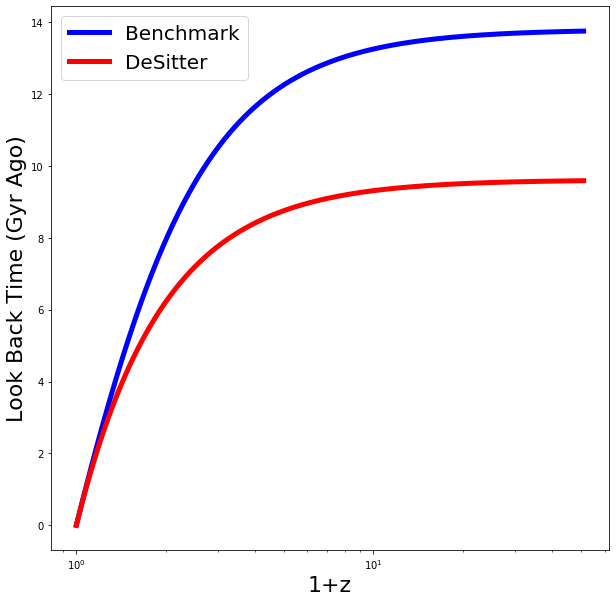

In [21]:
# Plot the Look Back Time as a Function of Redshift out to z=10
################################################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# Look Back Time Benchmark
# FILL THIS IN
plt.semilogx(1 + zrange , TimeBenchMark, color='blue', linewidth=5, label='Benchmark')


# Look Back Time Einstein De Sitter
# FILL THIS IN
plt.semilogx(1 + zrange,  TimeDeSitter, color='red', linewidth=5, label='DeSitter')


# Add axis labels
plt.xlabel('1+z', fontsize=22)
plt.ylabel('Look Back Time (Gyr Ago)', fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

legend = ax.legend(loc='upper left',fontsize=20)

# Save to a file
ax.set_rasterized(True)
#plt.savefig('LookBackTime.png', rasterized=True, dpi=350)

## Question 2 B)

In [30]:
# Question 2 B

# What is the size of the presently observable universe in the Benchmark cosmology ? (pick a large z)
# this is the size assuming the present day scale factor 
BenchMark.ComovingDistance(1000)

<Quantity 13892.80996183 Mpc>

In [31]:
# What is the size of the presently observable universe in the Einstein De Sitter cosmology? (pick a large z)
DeSitter.ComovingDistance(1000)

<Quantity 8562.65801348 Mpc>

In [ ]:
# Which is larger? 

# BenchMark is larger, and accordingly the universe is older today (1 B)

## Question 2 C)

In [ ]:
# What is the current distance between two closely located galaxies on the sky, where one galaxy
# is  at z=0.01 and the second galaxy is at z =0.05 ?

In [33]:
z1 = 0.01
z2 = 0.05

In [34]:
# What is their comoving separation at each redshift
Dist_z1 = BenchMark.ComovingDistance(z1)
Dist_z2 = BenchMark.ComovingDistance(z2)
# Find the difference
Dist = Dist_z2-Dist_z1
Dist


<Quantity 174.44993323 Mpc>

In [35]:
# Physical Distance AT THAT Redshift: Proper Distance = R(t)u = u/(1+z)
# Need to multiply by the correct scale factor 1/ (1+zavg)
zavg = .03

Dist/(1+zavg)


<Quantity 169.36886721 Mpc>

## Question 2 E)

In [39]:
# First double check, that the proper distance = comoving radial distance if z_obs=0   (line of sight distance)

BenchMark.ProperDistance(0,1000)

<Quantity 13892.80996183 Mpc>

In [41]:
# What is the size of the observable universe at z=2? 
BenchMark.ProperDistance(2,1000)

<Quantity 4630.93665394 Mpc>

In [42]:
# how much larger was the universe then vs now?
# expect (1+z) factor of expansion, size of universe changes by the scale factor. 
BenchMark.ProperDistance(0,1000)/BenchMark.ProperDistance(2,1000)


<Quantity 3.>

##  Question 2 F)

In [43]:
zmax = 10
zmin = 0.001
zrange2 = np.arange(zmin, zmax, 0.5)

In [44]:
# What is the size of the universe at each redshit in each cosmology
HorizonBenchMark = [BenchMark.ProperDistance(i,1000).value for i in zrange2]
HorizonDeSitter = [DeSitter.ProperDistance(i,1000).value for i in zrange2]

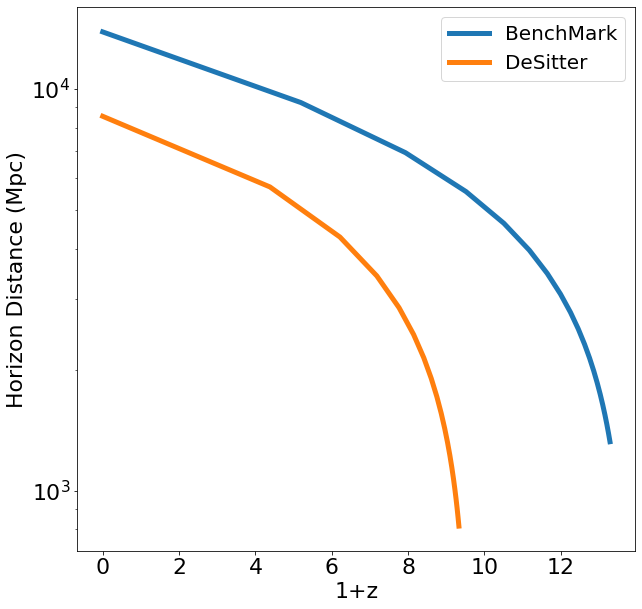

In [49]:
# Plot the Horizon Distance as a Function of Redshift out to z=10
###############################################################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# Comoving Distance
# FILL THIS IN
plt.semilogy(TimeBenchMark, HorizonBenchMark , linewidth=5, label='BenchMark')

plt.semilogy(TimeDeSitter , HorizonDeSitter  , linewidth=5, label='DeSitter')


# Add axis labels
plt.xlabel('1+z', fontsize=22)
plt.ylabel('Horizon Distance (Mpc)', fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

legend = ax.legend(loc='upper right',fontsize=20)

# Save to a file
ax.set_rasterized(True)
plt.savefig('HorizonDistance.png', rasterized=True, dpi=350)

## Question 3 B)

 Luminosity distances are used to measure distances and infer redshifts for standard candles. 

 Consider that you observe a Type Ia Supernova with an apparent magnitude, m = 25.1
 Absolute magnitude of a Type Ia Supernova is -19.3±0.03 

 Using the Benchmark cosmology, determine this Supernova's redshift


In [51]:
# Question 3 B) 

# First What is the Luminosity Distance? 
# m-M = 5*log(DL/Mpc) + 25
m = 25.1
M=-19.3

DLSne = 10**((m-M-25.0)/5.0)*u.Mpc
DLSne

<Quantity 7585.77575029 Mpc>

In [60]:
# Now reverse engineer the problem. What redshift gives you the right answer? 
# in reality the redshift is determined by identifying the redshift of the host.  
BenchMark.LuminosityDistance(1.095)

<Quantity 7587.84545591 Mpc>

In [61]:
# What is the proper distance to this supernova given our current rate of expansion? 
BenchMark.ProperDistance(0,1.095)

<Quantity 3621.88327251 Mpc>

## Question 4 C) 

In [72]:
# Question 4 C)  

# Angle = Size/DA
# What is the separation between two galaxies separated by 1 arcsec at z=1 in the Benchmark Cosmology

rp = BenchMark.Separation(1,1)
rp

<Quantity 8.22192823 kpc>